In [1]:
import numpy as np 
import os 
import matplotlib.pyplot as plt 
import scipy.io


* SVD of matrix: $X = U \Sigma V^T \\$
* Then, we can reconstruct vector $x_j$ as, $x_j \approx U[:,:r] U[:,:r]^T x_j$, using first $r$ eign faces 
* Here $x_j$ is single instance of X (or column of $X$, or think as an image of one face)


In [2]:
# load data 
mat_contents = scipy.io.loadmat(os.path.join('databook_python', 'DATA','allFaces.mat'))
faces = mat_contents['faces']                       # matrix of faces, each column is a reshaped face 
m = int(mat_contents['m'])                          # pixel rows 
n = int(mat_contents['n'])                          # pixel columns 
nfaces = np.ndarray.flatten(mat_contents['nfaces']) # number of faces for each person 

In [3]:
# use first 36 poeple for making the eign-faces basis 
training_faces = faces[:,:np.sum(nfaces[:36])]            # use fist 36 images as training set 
avg_face = np.mean(training_faces,axis=1).reshape(-1,1)   # average face 

# find the eign faces of the mean substrcted data 
X = training_faces - avg_face                             # mean substracted faces 
U, S, VT = np.linalg.svd(X, full_matrices=False)          # svd 

(-0.5, 167.5, 191.5, -0.5)

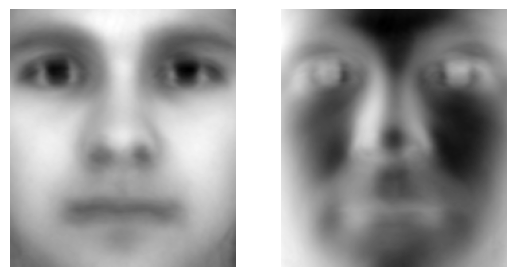

In [4]:
# plot eign faces 
fig1 = plt.figure()
ax1 = fig1.add_subplot(121)
img_avg = ax1.imshow(np.reshape(avg_face,(m,n)).T)      # the average face 
img_avg.set_cmap('gray')
plt.axis('off')

ax2 = fig1.add_subplot(122)
img_u1 = ax2.imshow(np.reshape(U[:,0],(m,n)).T)        # the first eign face 
img_u1.set_cmap('gray')
plt.axis('off')

(-0.5, 167.5, 191.5, -0.5)

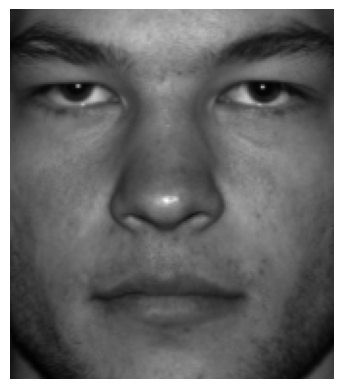

In [5]:
# reconstruct the faces in the test set using the eign-basis built using 36 images 

test_face = faces[:, np.sum(nfaces[:36])] # first face of the 37th person 
plt.imshow(np.reshape(test_face,(m,n)).T)
plt.set_cmap('gray')
plt.axis('off')

In [6]:
# This code is expensive (takes longer time to compute)
'''
test_faceMS = test_face - avg_face 
r_list = np.array([25,50,100,200,400,800,1600])

for r in r_list:
    recon_face = avg_face + U[:,:r] @ U[:,:r].T @ test_faceMS 
    img = plt.imshow(np.reshape(recon_face,(m,n)).T)
    img.set_cmap('gray')
    plt.title(f'r={r}')
    plt.axis('off')
    plt.show() '''

"\ntest_faceMS = test_face - avg_face \nr_list = np.array([2,5])\n\nfor r in r_list:\n    recon_face = avg_face + U[:,:r] @ U[:,:r].T @ test_faceMS \n    img = plt.imshow(np.reshape(recon_face,(m,n)).T)\n    img.set_cmap('gray')\n    plt.title(f'r={r}')\n    plt.axis('off')\n    plt.show() "

In the eign-faces the first few $U(i.e. \hspace{0.1cm} u_0,u_1,u_2 ..)$ have the commonalities of the faces and later eigen faces are captures the differences between the faces 